In [1]:
#import python packages
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import geopy.distance

# monkey with plotting parameters
sb=True
if sb:
    sns.set()
    sns.set_context('paper', font_scale=2.0, rc={"lines.linewidth": 1.5})
#     sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
    sns.set_style("whitegrid",{"xtick.top":True, "xtick.bottom":True,"ytick.left":True, "ytick.right":True})
# fontsz = 20
pd.set_option('display.max_rows', 500)
mpl.rcParams['axes.formatter.useoffset'] = False
mpl.rcParams.update({'figure.autolayout': True})
# plt.rcParams.update({'font.size':fontsz})

In [58]:
### Load the data.
### There are three pickles, each containing a pandas dataframe with the core data. (one has all, one has
### Antarctica, one has Greenland)
dfg = pd.read_pickle('sumup_greenland_2020.pkl')
dfa = pd.read_pickle('sumup_antarctica_2020.pkl')
df_all = pd.read_pickle('sumup_all_2020.pkl')

In [57]:
### Find the observation closest to a specified lat/lon
llpairs = df_all.index.droplevel(['date','cite']).unique().tolist()
site_ll = (72.58,-38.46) # this is the site you are interested in.
ddd = []
for kk, pair in enumerate(llpairs):
    try:
        distance = geopy.distance.distance(pair[1:],site_ll).km
    except Exception:
        distance = np.nan
    ddd.append(distance)
ddd = np.array(ddd)

/Users/maxstev/miniconda3/lib/python3.7/site-packages/geopy/point.py:472: UserWarning: Latitude normalization has been prohibited in the newer versions of geopy, because the normalized value happened to be on a different pole, which is probably not what was meant. If you pass coordinates as positional args, please make sure that the order is (latitude, longitude) or (y, x) in Cartesian terms.
  return cls(*args)


In [41]:
closest_ind = np.nanargmin(ddd) # index of the closest core
close_cores_ind = np.where(ddd<10)[0] # indices of all cores within 10 km
closest_ID = llpairs[closest_ind][0] # coreid number of the closest core (based on my core numbering system)
close_cores_ID = np.array(llpairs)[close_cores_ind][:,0].astype(int) # # coreid number of the close cores

In [48]:
df_close = df_all.loc[close_cores_ID].copy() #Data frame with the close cores
df_close[df_close.maxdepth>20].index.unique() #Index of the dataframe of close cores with depth>20 m

MultiIndex([( 507, 72.58799743652344, -38.457000732421875, '1999-01-01',  42),
            ( 596, 72.57758331298828,  -38.46907043457031, '2017-05-20',  48),
            (1554,  72.5943832397461,  -38.62501907348633, '2007-01-01', 186)],
           names=['coreid', 'lat', 'lon', 'date', 'cite'])

In [59]:
df_all.loc[596]

latlon  density  \
lat       lon       date       cite                                   
72.577583 -38.46907 2017-05-20 48    (72.57758, -38.46907)    0.331   
                               48    (72.57758, -38.46907)    0.333   
                               48    (72.57758, -38.46907)    0.322   
                               48    (72.57758, -38.46907)    0.334   
                               48    (72.57758, -38.46907)    0.329   
                               48    (72.57758, -38.46907)    0.320   
                               48    (72.57758, -38.46907)    0.285   
                               48    (72.57758, -38.46907)    0.364   
                               48    (72.57758, -38.46907)    0.356   
                               48    (72.57758, -38.46907)    0.342   
                               48    (72.57758, -38.46907)    0.395   
                               48    (72.57758, -38.46907)    0.375   
                               48    (72.57758, -38.46907)    0.338   
                               48    (72.57758, -38.46907)    0.289   
                               48    (72.57758, -38.46907)    0.351   
                               48    (72.57758, -38.46907)    0.375   
                               48    (72.57758, -38.46907)    0.411   
                               48    (72.57758, -38.46907)    0.396   
                               48    (72.57758, -38.46907)    0.409   
                               48    (72.57758, -38.46907)    0.372   
                               48    (72.57758, -38.46907)    0.328   
                               48    (72.57758, -38.46907)    0.389   
                               48    (72.57758, -38.46907)    0.393   
                               48    (72.57758, -38.46907)    0.385   
                               48    (72.57758, -38.46907)    0.386   
                               48    (72.57758, -38.46907)    0.369   
                               48    (72.57758, -38.46907)    0.363   
                               48    (72.57758, -38.46907)    0.389   
                               48    (72.57758, -38.46907)    0.406   
                               48    (72.57758, -38.46907)    0.341   
                               48    (72.57758, -38.46907)    0.465   
                               48    (72.57758, -38.46907)    0.378   
                               48    (72.57758, -38.46907)    0.534   
                               48    (72.57758, -38.46907)    0.365   
                               48    (72.57758, -38.46907)    0.369   
                               48    (72.57758, -38.46907)    0.381   
                               48    (72.57758, -38.46907)    0.419   
                               48    (72.57758, -38.46907)    0.398   
                               48    (72.57758, -38.46907)    0.390   
                               48    (72.57758, -38.46907)    0.411   
                               48    (72.57758, -38.46907)    0.417   
                               48    (72.57758, -38.46907)    0.400   
                               48    (72.57758, -38.46907)    0.389   
                               48    (72.57758, -38.46907)    0.348   
                               48    (72.57758, -38.46907)    0.372   
                               48    (72.57758, -38.46907)    0.395   
                               48    (72.57758, -38.46907)    0.413   
                               48    (72.57758, -38.46907)    0.399   
                               48    (72.57758, -38.46907)    0.431   
                               48    (72.57758, -38.46907)    0.409   
                               48    (72.57758, -38.46907)    0.442   
                               48    (72.57758, -38.46907)    0.445   
                               48    (72.57758, -38.46907)    0.438   
                               48    (72.57758, -38.46907)    0.402   
                               48    (72.57758, -38.46907)    0.407   
     

I just put in a bunch of sample cells of how to query the data frames to get something useful out of them.

In [53]:
# Get the data for the core with coreid = 1
df_all.loc[1]

density     top     bot    mid    elev  \
lat        lon        date       cite                                           
-80.779099 124.288002 2004-01-01 9        0.42 -9999.0 -9999.0  0.015 -9999.0   
                                 9        0.27 -9999.0 -9999.0  0.045 -9999.0   
                                 9        0.41 -9999.0 -9999.0  0.075 -9999.0   
                                 9        0.31 -9999.0 -9999.0  0.105 -9999.0   
                                 9        0.36 -9999.0 -9999.0  0.135 -9999.0   
                                 9        0.35 -9999.0 -9999.0  0.165 -9999.0   
                                 9        0.30 -9999.0 -9999.0  0.195 -9999.0   
                                 9        0.30 -9999.0 -9999.0  0.225 -9999.0   
                                 9        0.43 -9999.0 -9999.0  0.255 -9999.0   
                                 9        0.48 -9999.0 -9999.0  0.285 -9999.0   
                                 9        0.46 -9999.0 -9999.0  0.315 -9999.0   
                                 9        0.46 -9999.0 -9999.0  0.345 -9999.0   
                                 9        0.47 -9999.0 -9999.0  0.375 -9999.0   
                                 9        0.43 -9999.0 -9999.0  0.405 -9999.0   
                                 9        0.41 -9999.0 -9999.0  0.435 -9999.0   
                                 9        0.42 -9999.0 -9999.0  0.465 -9999.0   
                                 9        0.43 -9999.0 -9999.0  0.495 -9999.0   
                                 9        0.41 -9999.0 -9999.0  0.525 -9999.0   
                                 9        0.43 -9999.0 -9999.0  0.555 -9999.0   
                                 9        0.42 -9999.0 -9999.0  0.585 -9999.0   
                                 9        0.46 -9999.0 -9999.0  0.615 -9999.0   
                                 9        0.35 -9999.0 -9999.0  0.645 -9999.0   
                                 9        0.37 -9999.0 -9999.0  0.675 -9999.0   
                                 9        0.48 -9999.0 -9999.0  0.705 -9999.0   
                                 9        0.40 -9999.0 -9999.0  0.735 -9999.0   
                                 9        0.44 -9999.0 -9999.0  0.765 -9999.0   
                                 9        0.45 -9999.0 -9999.0  0.795 -9999.0   
                                 9        0.44 -9999.0 -9999.0  0.825 -9999.0   
                                 9        0.45 -9999.0 -9999.0  0.855 -9999.0   
                                 9        0.43 -9999.0 -9999.0  0.885 -9999.0   
                                 9        0.44 -9999.0 -9999.0  0.915 -9999.0   
                                 9        0.42 -9999.0 -9999.0  0.945 -9999.0   
                                 9        0.46 -9999.0 -9999.0  0.975 -9999.0   
                                 9        0.43 -9999.0 -9999.0  1.005 -9999.0   
                                 9        0.37 -9999.0 -9999.0  1.035 -9999.0   
                                 9        0.42 -9999.0 -9999.0  1.065 -9999.0   
                                 9        0.37 -9999.0 -9999.0  1.095 -9999.0   
                                 9        0.37 -9999.0 -9999.0  1.125 -9999.0   
                                 9        0.43 -9999.0 -9999.0  1.155 -9999.0   
                                 9        0.41 -9999.0 -9999.0  1.185 -9999.0   
                                 9        0.41 -9999.0 -9999.0  1.215 -9999.0   
                                 9        0.41 -9999.0 -9999.0  1.245 -9999.0   
                                 9        0.37 -9999.0 -9999.0  1.275 -9999.0   
                                 9        0.39 -9999.0 -9999.0  1.305 -9999.0   
                                 9        0.40 -9999.0 -9999.0  1.335 -9999.0   
                                 9        0.43 -9999.0 -9999.0  1.365 -9999.0   
                                 9        0.48 -9999.0 -9999.0  1.395 -9999.0   
                                 9        0.40 -9999.0 -9999.0  1.425 

In [ ]:
# Write the data from a particular core to a .csv file
dfa.loc[1].to_csv('core1.csv')

Text(0.5, 1.0, 'Firn density at (77.45, -51.06) on 2009-01-01 00:00:00')

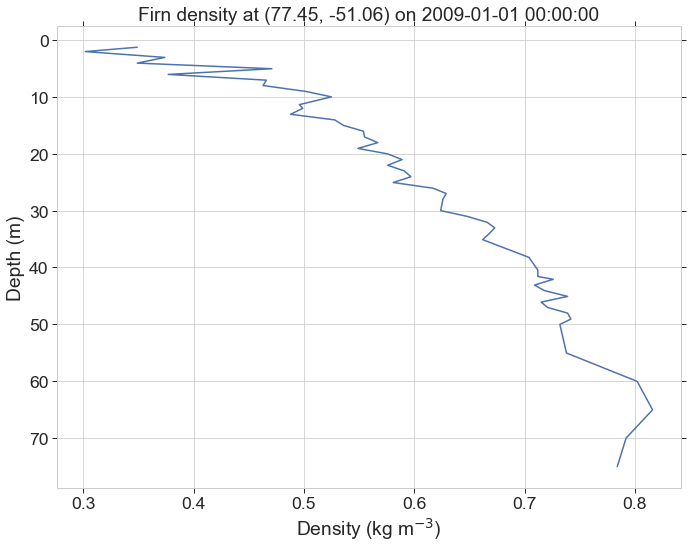

In [70]:
#plot the data for a paticular core
saveformat = '.eps'
core_number = 3

coredf = df_all.loc[core_number].copy()
f1,a1 = plt.subplots(figsize=(10,8))
a1.plot(coredf.density,coredf.mid)
a1.invert_yaxis()
a1.grid(True)
a1.set_ylabel('Depth (m)')
a1.set_xlabel(r'Density (kg m$^{-3}$)')
a1.set_title('Firn density at {} on {}'.format(str(coredf.latlon.values[0]),coredf.index.get_level_values('date')[0]))
# f1.savefig('SumUp_core{}{}'.format(core_number,saveformat))

In [71]:
# Get the cores with cite = 1 (there are several cores with this citation)
dfa.xs(1,level='cite')

latlon  density  \
coreid lat        lon         date                                        
52     -89.933296  144.393799 2002-01-01  (-89.9333, 144.3938)  0.42097   
                              2002-01-01  (-89.9333, 144.3938)  0.41476   
                              2002-01-01  (-89.9333, 144.3938)  0.41884   
                              2002-01-01  (-89.9333, 144.3938)  0.43748   
                              2002-01-01  (-89.9333, 144.3938)  0.44580   
...                                                        ...      ...   
84     -76.097298 -89.017700  2001-01-01  (-76.0973, -89.0177)  0.59236   
                              2001-01-01  (-76.0973, -89.0177)  0.60153   
                              2001-01-01  (-76.0973, -89.0177)  0.60671   
                              2001-01-01  (-76.0973, -89.0177)  0.60558   
                              2001-01-01  (-76.0973, -89.0177)  0.61721   

                                             top     bot        mid    elev  \
coreid lat        lon         date                                            
52     -89.933296  144.393799 2002-01-01 -9999.0 -9999.0   3.305000  2808.0   
                              2002-01-01 -9999.0 -9999.0   4.255000  2808.0   
                              2002-01-01 -9999.0 -9999.0   5.245000  2808.0   
                              2002-01-01 -9999.0 -9999.0   6.220000  2808.0   
                              2002-01-01 -9999.0 -9999.0   7.205000  2808.0   
...                                          ...     ...        ...     ...   
84     -76.097298 -89.017700  2001-01-01 -9999.0 -9999.0  13.607500  1228.0   
                              2001-01-01 -9999.0 -9999.0  14.620000  1228.0   
                              2001-01-01 -9999.0 -9999.0  15.592500  1228.0   
                              2001-01-01 -9999.0 -9999.0  16.556999  1228.0   
                              2001-01-01 -9999.0 -9999.0  17.566000  1228.0   

                                           error    maxdepth  
coreid lat        lon         date                            
52     -89.933296  144.393799 2002-01-01 -9999.0  139.485001  
                              2002-01-01 -9999.0  139.485001  
                              2002-01-01 -9999.0  139.485001  
                              2002-01-01 -9999.0  139.485001  
                              2002-01-01 -9999.0  139.485001  
...                                          ...         ...  
84     -76.097298 -89.017700  2001-01-01 -9999.0   17.566000  
                              2001-01-01 -9999.0   17.566000  
                              2001-01-01 -9999.0   17.566000  
                              2001-01-01 -9999.0   17.566000  
                              2001-01-01 -9999.0   17.566000  

[2048 rows x 8 columns]

In [72]:
# Sample the Antarctic dataframe for cores from above 2000 m elevation
dfa[dfa.elev>2000]

latlon  density  \
coreid lat        lon        date       cite                                  
52     -89.933296 144.393799 2002-01-01 1     (-89.9333, 144.3938)  0.42097   
                                        1     (-89.9333, 144.3938)  0.41476   
                                        1     (-89.9333, 144.3938)  0.41884   
                                        1     (-89.9333, 144.3938)  0.43748   
                                        1     (-89.9333, 144.3938)  0.44580   
...                                                            ...      ...   
1494   -76.793999 31.900000  2007-12-20 178        (-76.794, 31.9)  0.36000   
1495   -76.899002 34.648998  2007-12-18 178      (-76.899, 34.649)  0.36200   
1496   -77.035004 36.740002  2007-12-16 178       (-77.035, 36.74)  0.34500   
1497   -77.091003 39.928001  2007-12-08 178      (-77.091, 39.928)  0.37700   
1498   -77.169998 38.594002  2007-12-16 178       (-77.17, 38.594)  0.33300   

                                                 top     bot    mid  \
coreid lat        lon        date       cite                          
52     -89.933296 144.393799 2002-01-01 1    -9999.0 -9999.0  3.305   
                                        1    -9999.0 -9999.0  4.255   
                                        1    -9999.0 -9999.0  5.245   
                                        1    -9999.0 -9999.0  6.220   
                                        1    -9999.0 -9999.0  7.205   
...                                              ...     ...    ...   
1494   -76.793999 31.900000  2007-12-20 178      0.0     1.0  0.500   
1495   -76.899002 34.648998  2007-12-18 178      0.0     1.0  0.500   
1496   -77.035004 36.740002  2007-12-16 178      0.0     1.0  0.500   
1497   -77.091003 39.928001  2007-12-08 178      0.0     1.0  0.500   
1498   -77.169998 38.594002  2007-12-16 178      0.0     1.0  0.500   

                                                     elev   error    maxdepth  
coreid lat        lon        date       cite                                   
52     -89.933296 144.393799 2002-01-01 1     2808.000000 -9999.0  139.485001  
                                        1     2808.000000 -9999.0  139.485001  
                                        1     2808.000000 -9999.0  139.485001  
                                        1     2808.000000 -9999.0  139.485001  
                                        1     2808.000000 -9999.0  139.485001  
...                                                   ...     ...         ...  
1494   -76.793999 31.900000  2007-12-20 178   3741.100098 -9999.0    1.000000  
1495   -76.899002 34.648998  2007-12-18 178   3756.500000 -9999.0    1.000000  
1496   -77.035004 36.740002  2007-12-16 178   3779.399902 -9999.0    1.000000  
1497   -77.091003 39.928001  2007-12-08 178   3788.399902 -9999.0    1.000000  
1498   -77.169998 38.594002  2007-12-16 178   3795.600098 -9999.0    1.000000  

[306588 rows x 8 columns]

In [73]:
# get the coreids for all cores in Antarctica from greater than 2000 m
dfa[dfa.elev>2000].index.get_level_values('coreid').unique().values

array([  52,   53,   54,   55,   56,   57,   58,   59,   61,   63,   64,
         67,   71,   77,   78,   80,   86,  602,  603,  604,  605,  606,
        607,  608,  609,  610,  611,  612,  613,  614,  615,  616,  617,
        618,  619,  620,  621,  622,  623,  624,  625,  626,  627,  628,
        678,  680,  681,  682,  683,  692,  693,  694,  695,  697,  698,
        701,  702,  703,  704,  705,  706,  707,  709,  710,  711,  712,
        713,  714,  715,  716,  719,  720,  723,  724,  739,  777,  778,
        779,  780,  781,  782,  783,  784,  785,  786,  787,  788,  789,
        790,  791,  792,  793,  794,  795,  796,  797,  801,  802,  803,
        804,  805,  806,  807,  808,  809,  810,  811,  812,  813,  814,
        815,  816,  817,  818,  819,  820,  821,  822,  823,  824,  825,
        826,  827,  828,  829,  830,  831,  832,  833,  834,  835,  836,
        837,  838,  839,  840,  841,  842,  843,  844,  845,  846,  847,
        848,  849,  850,  851,  852,  853,  854,  8

In [74]:
# Create a new dataframe of cores close to Summit, Greenland,  72.57972, -38.50454 
df_Summit = dfg[(dfg.index.get_level_values('lat')>72.0) & (dfg.index.get_level_values('lat')<73.0) & (dfg.index.get_level_values('lon')<-38.0) & (dfg.index.get_level_values('lon')>-39.0)].copy()      

In [76]:
# There are 203 unique cores from Summit.
df_Summit.index.get_level_values('coreid').unique()

Int64Index([  10,   11,  115,  116,  117,  118,  119,  120,  121,  122,
            ...
            1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1561, 1586],
           dtype='int64', name='coreid', length=203)

In [77]:
#But only one that is deeper than 30 m.
df_Summit[df_Summit.maxdepth>30]

latlon  density  \
coreid lat       lon        date       cite                               
507    72.587997 -38.457001 1999-01-01 42    (72.588, -38.457)    0.884   
                                       42    (72.588, -38.457)    0.884   
                                       42    (72.588, -38.457)    0.884   
                                       42    (72.588, -38.457)    0.884   
                                       42    (72.588, -38.457)    0.884   
...                                                        ...      ...   
                                       42    (72.588, -38.457)    0.919   
                                       42    (72.588, -38.457)    0.919   
                                       42    (72.588, -38.457)    0.919   
                                       42    (72.588, -38.457)    0.919   
                                       42    (72.588, -38.457)    0.919   

                                                    top         bot  \
coreid lat       lon        date       cite                           
507    72.587997 -38.457001 1999-01-01 42     94.279999   94.279999   
                                       42     94.279999   94.650002   
                                       42     94.650002   94.949997   
                                       42     94.949997   95.209999   
                                       42     95.209999   95.529999   
...                                                 ...         ...   
                                       42    333.329987  333.510010   
                                       42    333.510010  333.660004   
                                       42    333.660004  333.980011   
                                       42    333.980011  334.170013   
                                       42    334.170013  334.529999   

                                                    mid    elev   error  \
coreid lat       lon        date       cite                               
507    72.587997 -38.457001 1999-01-01 42     94.279999  3203.0 -9999.0   
                                       42     94.464996  3203.0 -9999.0   
                                       42     94.800003  3203.0 -9999.0   
                                       42     95.080002  3203.0 -9999.0   
                                       42     95.370003  3203.0 -9999.0   
...                                                 ...     ...     ...   
                                       42    333.420013  3203.0 -9999.0   
                                       42    333.584991  3203.0 -9999.0   
                                       42    333.820007  3203.0 -9999.0   
                                       42    334.075012  3203.0 -9999.0   
                                       42    334.350006  3203.0 -9999.0   

                                               maxdepth  
coreid lat       lon        date       cite              
507    72.587997 -38.457001 1999-01-01 42    334.529999  
                                       42    334.529999  
                                       42    334.529999  
                                       42    334.529999  
                                       42    334.529999  
...                                                 ...  
                                       42    334.529999  
                                       42    334.529999  
                                       42    334.529999  
                                       42    334.529999  
                                       42    334.529999  

[1019 rows x 8 columns]

In [87]:
### Next few cells show how you might derive statistics about the surface density at a site.

In [80]:
df_Summit[df_Summit.mid<1].density.describe()

count    6282.000000
mean        0.324387
std         0.056130
min         0.057000
25%         0.292929
50%         0.329293
75%         0.360000
max         0.918000
Name: density, dtype: float64

In [86]:
df_Summit2.groupby(level=0).head(1).maxdepth.describe()

NameError: name 'df_Summit2' is not defined

In [81]:
df_wa = dfa[(dfa.index.get_level_values('lat')>-86.0) & (dfa.index.get_level_values('lat')<-72.0) & (dfa.index.get_level_values('lon')<-40.0) & (dfa.index.get_level_values('lon')>-179.0)].copy()      

In [82]:
df_wa.index.get_level_values('coreid').unique()

Int64Index([  4,   5,   6,   7,   8,   9,  44,  58,  60,  62,
            ...
            757, 758, 759, 760, 761, 762, 763, 764, 765, 766],
           dtype='int64', name='coreid', length=114)

In [83]:
df_wa3=df_wa.copy()
df_wa3.drop(['latlon','elev','error'],axis=1,inplace=True)
df_wa3=df_wa3.droplevel(['lat','lon','date','cite'])

In [84]:
m05 = {'rho10cm':[df_wa3.loc[u][df_wa3.loc[u].mid<0.3].density.mean() for u in df_wa3.index.unique()],'rho50cm':[df_wa3.loc[u][df_wa3.loc[u].mid<0.5].density.mean() for u in df_wa3.index.unique()],'rho100cm':[df_wa3.loc[u][df_wa3.loc[u].mid<1.0].density.mean() for u in df_wa3.index.unique()],'rhob50':[df_wa3.loc[u][((df_wa3.loc[u].mid<1.0) & (df_wa3.loc[u].mid>0.5))].density.mean() for u in df_wa3.index.unique()]}    
df_pitmeans = pd.DataFrame(m05,index = df_wa3.index.unique())

In [85]:
df_pitmeans.describe()

,rho10cm,rho50cm,rho100cm,rhob50
count,76.000000,84.000000,86.000000,81.000000
mean,0.357452,0.370777,0.380363,0.388612
std,0.051270,0.043471,0.040606,0.039831
min,0.264000,0.300909,0.314400,0.321000
25%,0.324262,0.344028,0.355870,0.365714
50%,0.359890,0.366500,0.371781,0.382000
75%,0.392944,0.396871,0.403039,0.410000
max,0.584426,0.583766,0.580937,0.578108
